In [1]:
import scipy.io as sio
import os
import scipy.io
import scipy.ndimage
import spectral
import spectral.io.envi as envi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from random import shuffle


## 分类
0.   其他
1.   较低油分
2.   低油分
3.    中油分
4.    高油分


In [2]:
def loadData(flieName, dataIndex, temp_split=4):
    
    print("------------  loadData  ", dataIndex)
    # 原始数据路径
    DATA_PATH = os.path.join(os.getcwd(), flieName)

    index = str(dataIndex)
    data = envi.open( os.path.join(DATA_PATH, "{}.hdr".format(index)) ,os.path.join(DATA_PATH, "{}.dat".format(index)))
    mask_data = envi.open( os.path.join(DATA_PATH, "mask_{}.hdr".format(index)) ,os.path.join(DATA_PATH, "mask_{}.tiff".format(index)))

    HEIGHT = data.shape[0] //temp_split
    WIDTH = data.shape[1] //temp_split
    BAND = data.shape[2]
#     BAND = BAND_SIZE
    new_shape=(BAND,HEIGHT,WIDTH)
    new_data = np.zeros(new_shape, dtype = float)
    label = np.zeros((HEIGHT, WIDTH), dtype = int)
    

    sample_count = 0
    for h in range(HEIGHT): 
        for w in range(WIDTH):
            x = h*temp_split
            y = w*temp_split
            for b in range(BAND):
                new_data[b][h][w] = data[x,y][b]

            if(sum(mask_data[x, y])  > 0.01 ):
                label[h][w] = dataIndex 
                sample_count += 1
            else:
                label[h][w] = 0
    
    
    new_data = np.transpose(new_data, (1, 2, 0))  # 将通道数提前，便于数组处理操作
    print("sample_count = {} ".format(sample_count))
    print("data shape : ", new_data.shape)
    print("label shape : ", label.shape)
    return new_data, label

PATCH  样本数量 * 通道 * 高 * 宽

In [3]:
def create_sample_data(index):
    
    data, label = loadData("dataset", index)

    height = data.shape[0]
    width = data.shape[1]
    band = data.shape[2]
    
    
    print("band    : ", band)
    print("height  : ", height)
    print("width   : ", width)
    sample_count = 0
    for h in range(height):
        for w in range(width):
            if label[h][w] == index:
                sample_count += 1

    print("count   : ", sample_count)
    new_shape= (sample_count, band)
    temp_data = np.zeros(new_shape, dtype = float) 
    
    count = 0 
    for h in range(height):
        for w in range(width):
            if label[h][w] == index:
                for b in range(band):
                    temp_data[count][b] = data[h][w][b]
                count += 1
                
    return temp_data
    
    

In [5]:
%%time


new_data1  =  create_sample_data(1)
new_data2  =  create_sample_data(2)
new_data3  =  create_sample_data(3)
new_data4  =  create_sample_data(4)

------------  loadData   1
sample_count = 5341 
data shape :  (128, 128, 204)
label shape :  (128, 128)
band    :  204
height  :  128
width   :  128
count   :  5341
------------  loadData   2
sample_count = 4538 
data shape :  (128, 128, 204)
label shape :  (128, 128)
band    :  204
height  :  128
width   :  128
count   :  4538
------------  loadData   3
sample_count = 5018 
data shape :  (128, 128, 204)
label shape :  (128, 128)
band    :  204
height  :  128
width   :  128
count   :  5018
------------  loadData   4
sample_count = 5089 
data shape :  (128, 128, 204)
label shape :  (128, 128)
band    :  204
height  :  128
width   :  128
count   :  5089
CPU times: user 2min 24s, sys: 136 ms, total: 2min 24s
Wall time: 2min 23s


In [6]:
def drawLine(new_data):

    plt.figure(figsize=(22, 3))
    new_data1.shape
    size = new_data1.shape[0]
    split = size // 4
    

    #第一行第一列图形
    ax1 = plt.subplot(1,4,1)
    ax2 = plt.subplot(1,4,2)
    ax3 = plt.subplot(1,4,3)
    ax4 = plt.subplot(1,4,4)
    x= np.linspace(0, 100 ,new_data.shape[1])

    
    plt.sca(ax1)
    plt.plot(x,new_data[split * 0])
    
    
    plt.sca(ax2)
    plt.plot(x,new_data[split * 1])
    
    
    plt.sca(ax3)
    plt.plot(x,new_data[split * 2])
    
    
    plt.sca(ax4)
    plt.plot(x,new_data[split * 3])

    plt.show()
    


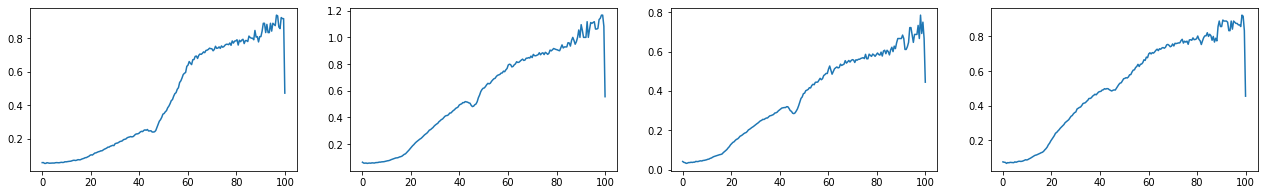

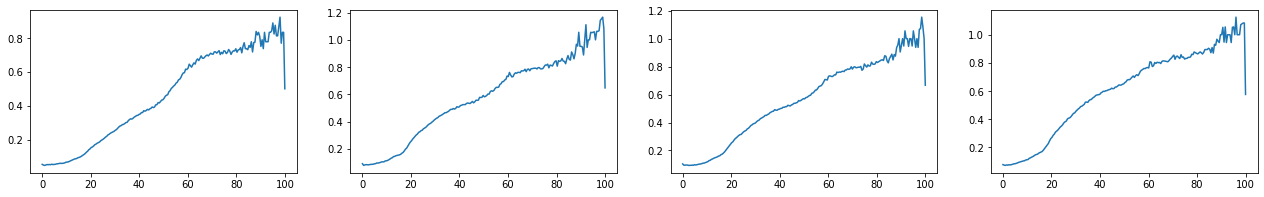

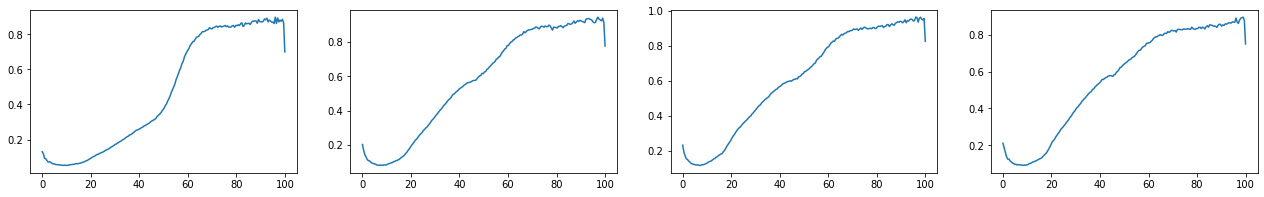

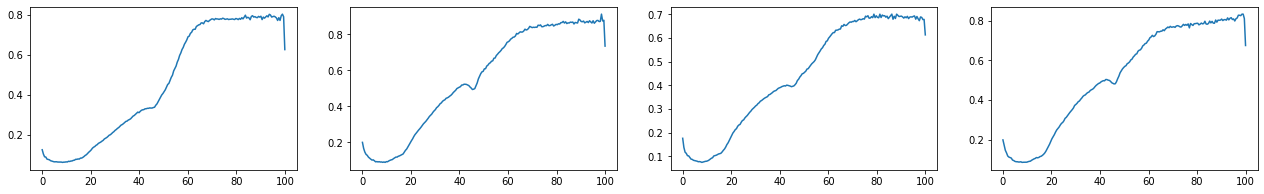

In [7]:
drawLine(new_data1)
drawLine(new_data2)
drawLine(new_data3)
drawLine(new_data4)

In [8]:
def drawLine(d1, d2):

    plt.figure(figsize=(22, 5))
    size_1 = d1.shape[0]
    split_1 = size_1 // 4
    
    size_2 = d2.shape[0]
    split_2 = size_2 // 4
    

    #第一行第一列图形
    ax1 = plt.subplot(1,4,1)
    ax2 = plt.subplot(1,4,2)
    ax3 = plt.subplot(1,4,3)
    ax4 = plt.subplot(1,4,4)
    x= np.linspace(0, d1.shape[1] ,d1.shape[1])

    
    plt.sca(ax1)
    plt.plot(x,d1[split_1 * 0])
    plt.plot(x,d2[split_2 * 0], color='red')
    
    
    plt.sca(ax2)
    plt.plot(x,d1[split_1 * 1])
    plt.plot(x,d2[split_2 * 1], color='red')
    
    
    plt.sca(ax3)
    plt.plot(x,d1[split_1 * 2])
    plt.plot(x,d2[split_2 * 2], color='red')
    
    
    plt.sca(ax4)
    plt.plot(x,d1[split_1 * 3])
    plt.plot(x,d2[split_2 * 3], color='red')
    
    plt.show()


### 中油分和高油分

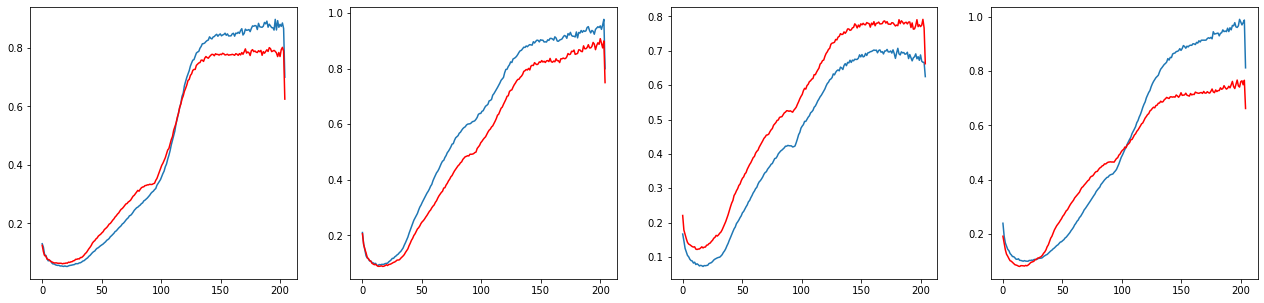

In [9]:
drawLine(new_data3, new_data4)

### 低油分和较低油分

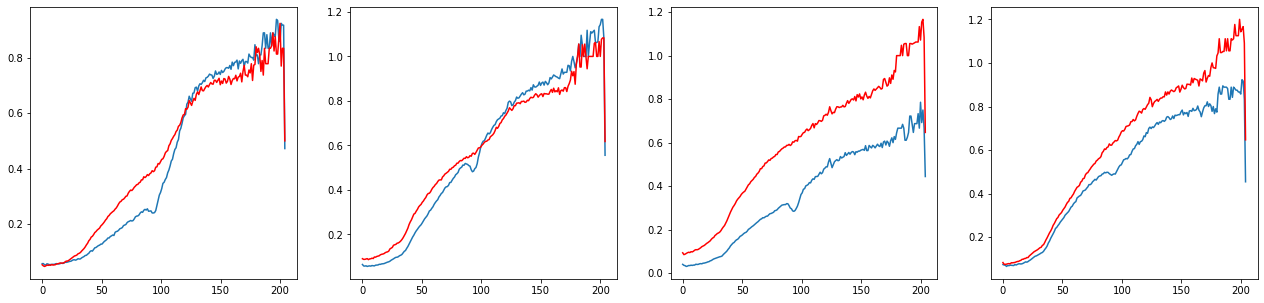

In [10]:
drawLine(new_data1, new_data2)